In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import helpers as h
%matplotlib inline

In [3]:
import gzip

In [4]:
n_samples = 100
L = int(1e8)
w = int(1e3)
lim = L//(10*w)
print(lim)
pos = w*(np.arange(L//w)+0.5)
dist = w*np.arange(lim + 1)

10000


In [5]:
N = 1e3
s = 1e-1
mu_n = 1e-7
r = 1e-8
pi_0 = 2*N*mu_n
seg_0 = 2*mu_n * N * np.sum(1.0/np.arange(1,n_samples))

In [7]:
fn = '../simulations/slim/sweeps_fsel-{}_corrmerged.txt.gz'
fsels = np.array([0.0, 1e-6, 1e-5, 1e-4, 1e-3])
n_fsel = len(fsels)
print(fsels)

[  0.00000000e+00   1.00000000e-06   1.00000000e-05   1.00000000e-04
   1.00000000e-03]


In [8]:
sfs = np.zeros((n_fsel, n_samples//2))
pi_corr = np.zeros((n_fsel, dist.shape[0]))
lohi_corr = np.zeros((n_fsel, n_samples//2 - 1, dist.shape[0]))
pi_mean = np.zeros(n_fsel)
lo_mean = np.zeros((n_fsel, n_samples//2 - 1))
hi_mean = np.zeros((n_fsel, n_samples//2 - 1))
for i, fsel in enumerate(fsels):
    with gzip.open(fn.format(fsel), 'rb') as infile:
        # SFS header and SFS
        infile.readline()
        sfs[i,:] = np.array(infile.readline().split())
        # PI_CORR header and PI_CORR
        infile.readline()
        pi_corr[i,:] = np.array(infile.readline().split())
        # LOHI_CORR header and LOHI_CORR
        infile.readline()
        #lohi_corr = np.zeros((n_samples//2 - 1, pi_corr.shape[0]))
        for j, line in enumerate(infile):
            lohi_corr[i,j,:] = line.split()
    pi_mean[i] = h.sfs2pi(sfs[i,:], n_samples)
    lo_mean[i] = np.cumsum(sfs[i,:])[:-1]
    hi_mean[i] = np.sum(sfs[i,:]) - lo_mean[i,:]

(-0.05, 1.05)

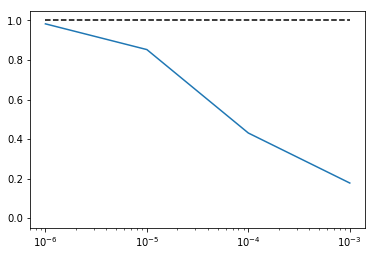

In [9]:
plt.semilogx(fsels, pi_mean/pi_mean[0])
plt.hlines(1.0, fsels[1], fsels[-1], linestyle='dashed')
plt.ylim([-0.05,1.05])

(-0.05, 1.05)

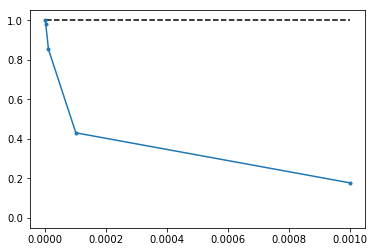

In [10]:
plt.plot(fsels, pi_mean/pi_mean[0], '.-')
plt.hlines(1.0, fsels[1], fsels[-1], linestyle='dashed')
plt.ylim([-0.05,1.05])

In [15]:
d_c = (2.0*mu_n)/(pi_mean*r)
mu_s = fsels*mu_n
tneut_twait = mu_s * (N*s)**2 / (r*np.log(N*s))
tsweep_twait = (mu_s*N*s) / r
print(d_c)
print(tneut_twait)
print(tsweep_twait)

[ 100664.72263714  102429.75679871  118070.90853626  233833.00200543
  567142.98078248]
[  0.           0.02171472   0.21714724   2.17147241  21.7147241 ]
[  0.00000000e+00   1.00000000e-03   1.00000000e-02   1.00000000e-01
   1.00000000e+00]


In [37]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', [str(x) for x in np.linspace(0,0.8,n_fsel)])))

In [38]:
freqs = np.arange(1, n_samples//2+1)

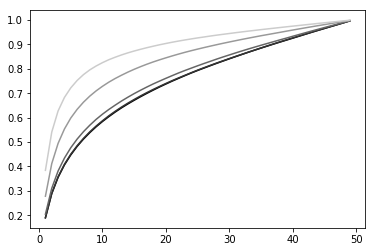

In [39]:
for i, fsel in enumerate(fsels):
    plt.plot(freqs[:-1], lo_mean[i,]/np.sum(sfs[i]))

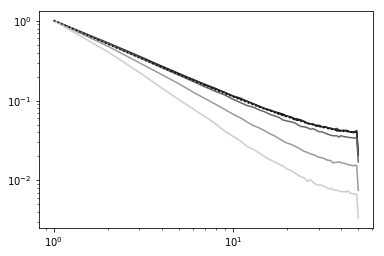

In [32]:
for i, fsel in enumerate(fsels):
    plt.loglog(freqs, sfs[i,:]/sfs[i,0])
plt.loglog(freqs, 1/freqs + 1/(n_samples-freqs), 'k:')

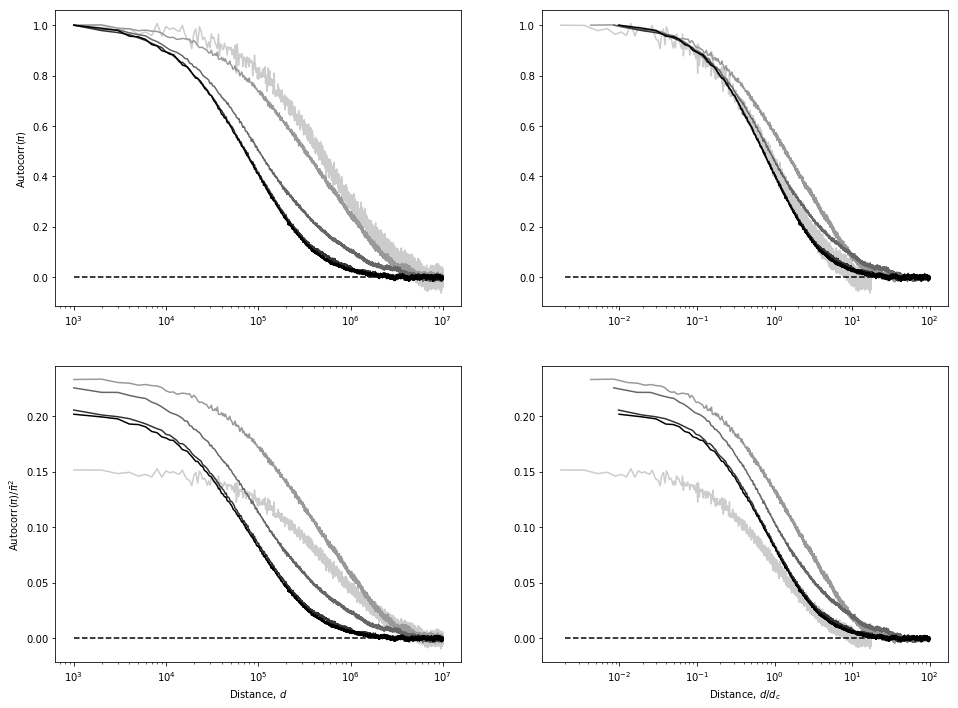

In [50]:
plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
for i, fsel in enumerate(fsels):
    ax1.semilogx(dist[1:], pi_corr[i, 1:]/pi_corr[i,1], zorder=(n_fsel-i))
    ax2.semilogx(dist[1:]/d_c[i], pi_corr[i, 1:]/pi_corr[i,1], zorder=(n_fsel-i))
    ax3.semilogx(dist[1:], pi_corr[i, 1:]/pi_mean[i]**2, zorder=(n_fsel-i))
    ax4.semilogx(dist[1:]/d_c[i], pi_corr[i, 1:]/pi_mean[i]**2, zorder=(n_fsel-i))
ax1.hlines(0, 1e3, 1e7, linestyle='dashed', zorder=10)
ax1.set_ylabel(r'Autocorr($\pi$)')
ax2.hlines(0, 2e-3, 100, linestyle='dashed', zorder=10)
ax3.hlines(0, 1e3, 1e7, linestyle='dashed', zorder=10)
ax3.set_ylabel(r'Autocorr($\pi$)/$\bar{\pi}^2$')
ax3.set_xlabel(r'Distance, $d$')
ax4.hlines(0, 2e-3, 100, linestyle='dashed', zorder=10)
ax4.set_xlabel(r'Distance, $d/d_c$')

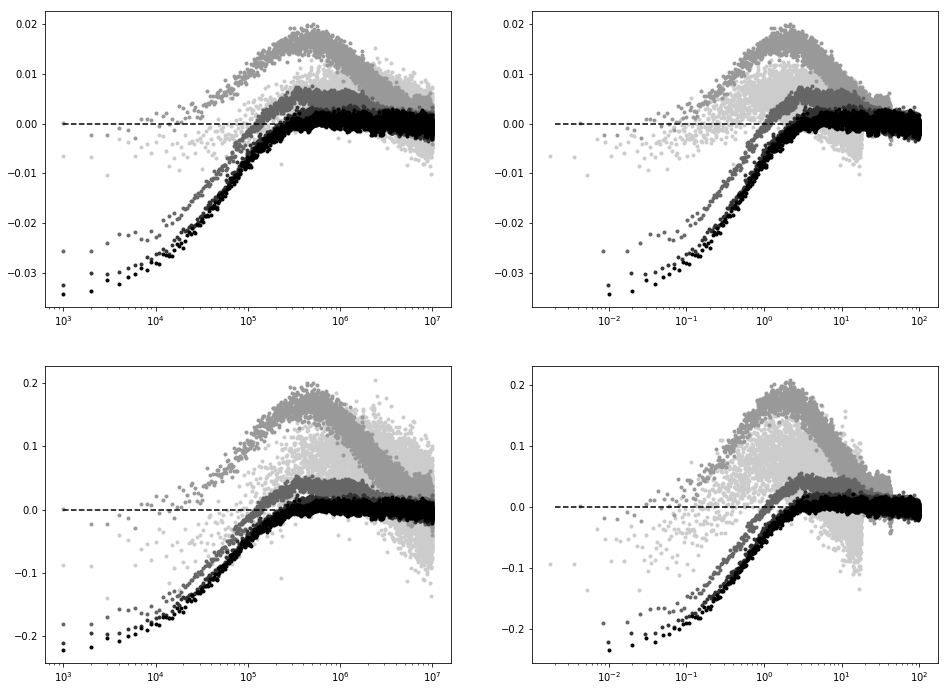

In [69]:
cutoff_freq = 10

plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
for i, fsel in enumerate(fsels):
    ax1.semilogx(dist, lohi_corr[i, cutoff_freq-1]/(lo_mean[i, cutoff_freq-1]*hi_mean[i, cutoff_freq-1]), '.', zorder=(n_fsel-i))
    ax2.semilogx(dist/d_c[i], lohi_corr[i, cutoff_freq-1]/(lo_mean[i, cutoff_freq-1]*hi_mean[i, cutoff_freq-1]), '.', zorder=(n_fsel-i))
    ax3.semilogx(dist, lohi_corr[i, cutoff_freq-1]/pi_mean[i]**2, '.', zorder=(n_fsel-i))
    ax4.semilogx(dist/d_c[i], lohi_corr[i, cutoff_freq]/pi_mean[i]**2, '.', zorder=(n_fsel-i))
ax1.hlines(0, 1e3, 1e7, linestyle='dashed', zorder=10)
ax2.hlines(0, 2e-3, 100, linestyle='dashed', zorder=10)
ax3.hlines(0, 1e3, 1e7, linestyle='dashed', zorder=10)
ax4.hlines(0, 2e-3, 100, linestyle='dashed', zorder=10)

# To-Do:
- Smoothing
- Plots for all cutoff values
- Color?